<a href="https://colab.research.google.com/github/Misbaxx99/-komomi-og-it/blob/main/Classfication_MNIST_Exercise_GENAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 3 – Classification - Based on this chapter**

_This notebook contains an excerpt of the sample code and solutions to the exercises in chapter 3._

# Setup

This project requires Python 3.7 or above:

In [52]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [53]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes to make the figures prettier:

In [54]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# MNIST

Load the MNIST dataset

In [55]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

How to get the description of the dataset

In [56]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

How to get information about the structure of the data set

In [57]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Assign learning data to X and labels to y

In [58]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Extract information about the data

In [59]:
X.shape

(70000, 784)

In [60]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [61]:
y.shape

(70000,)

In [62]:
28 * 28

784

Demoing the bitmap structure

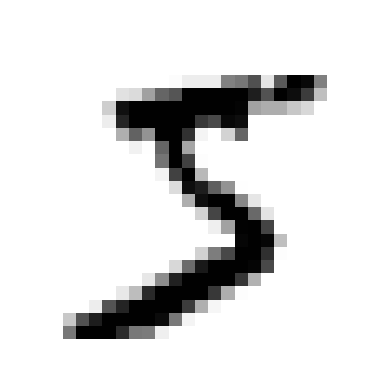

In [63]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)

plt.show()

In [64]:
y[0]

'5'

Extracting training and test sets

In [65]:
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = X[:10000], X[68000:], y[:10000], y[68000:] #For better execution time

# Training a Binary Classifier

###Excercise(s):

1. Evaluate the 'shapes' of 'X_train', 'X_test', 'y_train' and 'y_test' by making code cells as below.

In [66]:
##Start with this one
X_train.shape


(10000, 784)

2. What does that tell us?

###Extracting binary labels - true or false

In [67]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

###Excercise(s):

1. Evaluate 'y_train_5' and 'y_test_5' in code cells as done below

In [68]:
y_train_5

array([ True, False, False, ..., False, False, False])

2. Explain the results

#Applying a classifier


 In this case a SGDClassifier and we let it learn from training data with the fit method

In [69]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Let it predict 'some_digit' in this case a '5'

In [70]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Confusion Matrix

Establish the confusion matrix for the training data

In [71]:
y_train_pred = sgd_clf.predict(X_train)

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[8846,  291],
       [  46,  817]])

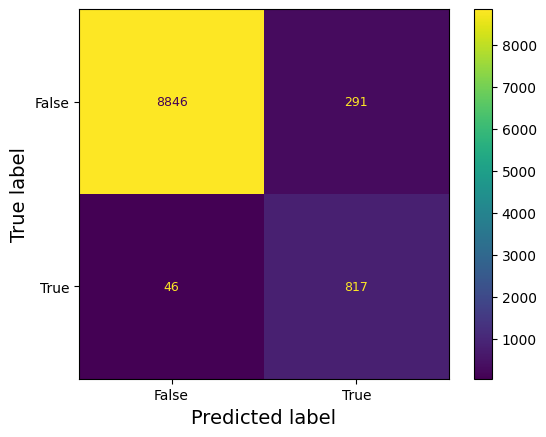

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

###Excercise(s)

1. Establish the confusion matrix on the **test set** in some code cells below

In [74]:
##Start with this
y_test_pred = sgd_clf.predict(X_test)

Establish the confusion matrix with perfect predictions

In [75]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[9137,    0],
       [   0,  863]])

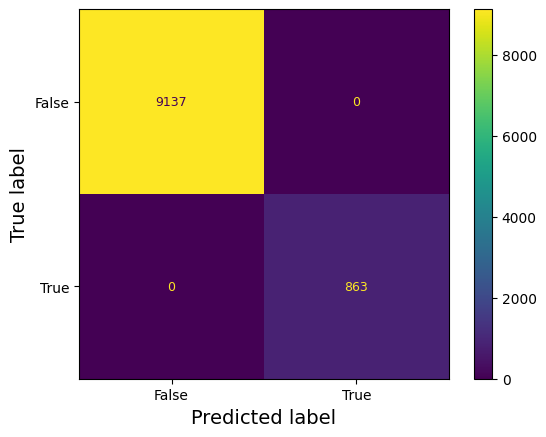

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_perfect_predictions)
plt.show()

## Accuracy, Precision and Recall

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score



Evaluate accuracy

In [78]:
accuracy_score(y_train_5, y_train_pred) ## (TP+TN)/(TP+FP+TN+FN)

0.9663

Evaluate precission

In [79]:
precision_score(y_train_5, y_train_pred)

0.7373646209386282

Evaluate recall

In [80]:
recall_score(y_train_5, y_train_pred)

0.9466975666280417

###Excercises

1. Explain the 3 scores accuracy, precision and recall in the current context

In [81]:
# prompt: Explain the 3 scores accuracy, precision and recall in the current context

# Accuracy:
#  - It represents the overall correctness of the model's predictions.
#  - In this context, it tells us what proportion of the predictions (whether a digit is a 5 or not) were correct.
#  - It is calculated as (True Positives + True Negatives) / Total Predictions.


# Precision:
#  - It focuses on the reliability of positive predictions.
#  - In this context, it tells us, out of all the predictions that were classified as 5, how many were actually 5.
#  - It is calculated as True Positives / (True Positives + False Positives).


# Recall:
#  - It focuses on the model's ability to find all positive instances.
#  - In this context, it tells us, out of all the actual 5s in the dataset, how many did the model correctly identify as 5.
#  - It is calculated as True Positives / (True Positives + False Negatives).

# In essence:
#  - **Accuracy** is a general measure of correctness.
#  - **Precision** is about how trustworthy the positive predictions are.
#  - **Recall** is about how many of the actual positive cases the model successfully identifies.


2. Establish evaluation of these scores for our **test data set** in code cells below

In [82]:
# prompt: Establish evaluation of these scores for our test data set in code cells below

# Evaluate accuracy for the test set
accuracy_score(y_test_5, y_test_pred)

# Evaluate precision for the test set
precision_score(y_test_5, y_test_pred)

# Evaluate recall for the test set
recall_score(y_test_5, y_test_pred)


0.9230769230769231

3. Does our digit recognition solution perform better or worse on test data compared to training data?

In [83]:
# prompt: Does our digit recognition solution perform better or worse on test data compared to training data?

print("Accuracy on training data:", accuracy_score(y_train_5, y_train_pred))
print("Accuracy on test data:", accuracy_score(y_test_5, y_test_pred))
print("Precision on training data:", precision_score(y_train_5, y_train_pred))
print("Precision on test data:", precision_score(y_test_5, y_test_pred))
print("Recall on training data:", recall_score(y_train_5, y_train_pred))
print("Recall on test data:", recall_score(y_test_5, y_test_pred))


Accuracy on training data: 0.9663
Accuracy on test data: 0.96
Precision on training data: 0.7373646209386282
Precision on test data: 0.6995515695067265
Recall on training data: 0.9466975666280417
Recall on test data: 0.9230769230769231


4. What does that mean?

In [84]:
# prompt: What does that mean?

# The model's performance on the test data is generally slightly worse than its performance on the training data,
# particularly in terms of accuracy, precision, and recall. This is a common phenomenon in machine learning known as overfitting.

# Overfitting occurs when a model learns the training data too well, including its noise and specific patterns that might not generalize well to new, unseen data.
# As a result, the model performs very well on the training set but struggles to make accurate predictions on the test set.

# In this specific case, it means that while the model has learned to classify digits as 5s reasonably well on the training data,
# it might be less accurate when dealing with new, previously unseen handwritten digits.

# It is important to aim for models that generalize well to new data, as this is the ultimate goal of machine learning.
# Techniques like regularization and using a validation set can help to mitigate overfitting and improve the generalization ability of the model.


###Questions

1. What is a binary classifier?
    

In [85]:
# prompt: What is a binary classifier?

# A binary classifier is a type of machine learning model that is designed to categorize data into one of two possible classes or categories.
# In simpler terms, it makes a decision about whether an input belongs to one class or the other.

# For example, in the MNIST dataset example, we used a binary classifier to distinguish whether a handwritten digit was a "5" or not (a different digit).
# Other examples of binary classification tasks include:
#   - Spam detection (spam or not spam)
#   - Medical diagnosis (disease present or not present)
#   - Credit risk assessment (high risk or low risk)


2. Why is the data set split into training and test sets?
    

In [86]:
# prompt: Why is the data set split into training and test sets?

# The dataset is split into training and test sets to evaluate the performance of a machine learning model in a realistic setting.

# Training Set:
#   - Used to train the model, allowing it to learn patterns and relationships within the data.
#   - The model adjusts its internal parameters based on the training data to improve its ability to make accurate predictions.

# Test Set:
#   - Used to assess how well the trained model generalizes to unseen data.
#   - It provides an unbiased estimate of the model's performance on new, real-world data.

# If we only used the training data for evaluation, the model might appear to perform very well, even if it has actually overfitted to the training data.
# Overfitting occurs when the model learns the training data too well, including its noise and specific patterns that might not generalize well to new data.
# As a result, it performs well on the training set but poorly on unseen data.

# By using a separate test set, we can determine whether the model can accurately predict outcomes for data it hasn't seen before.
# This is a crucial step in ensuring that the model is robust and reliable in its ability to make accurate predictions in real-world scenarios.

# In essence, the split into training and test sets is a fundamental practice in machine learning to prevent overfitting and provide a fair assessment of the model's generalization capability.


3. What is a confusion matrix?
    

In [87]:
# prompt: What is a confusion matrix?

# A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
# It allows you to visualize the performance of the model by showing the counts of true positive, true negative, false positive, and false negative predictions.


# Here's a breakdown of the components:


# True Positive (TP): The model correctly predicted the positive class (e.g., correctly identified a 5).
# True Negative (TN): The model correctly predicted the negative class (e.g., correctly identified a non-5).
# False Positive (FP): The model incorrectly predicted the positive class when the true class was negative (e.g., incorrectly identified a non-5 as a 5).
# False Negative (FN): The model incorrectly predicted the negative class when the true class was positive (e.g., incorrectly identified a 5 as a non-5).


# The confusion matrix helps you understand:


# Accuracy: How often the model makes correct predictions overall.
# Precision: How many of the positive predictions made by the model were actually correct.
# Recall (Sensitivity): How many of the actual positive instances did the model correctly identify.
# Specificity: How many of the actual negative instances did the model correctly identify.
# By analyzing these metrics, you can gain insights into the strengths and weaknesses of your classification model and identify areas for improvement.


# In the MNIST example, we used a confusion matrix to evaluate the performance of our binary classifier (digit 5 or not digit 5).
# It allowed us to see how many instances were correctly classified as 5s, how many were correctly classified as non-5s, and how many were misclassified.


4. Explain the values (TP, TN, FP, FN) in your confusion matrix?

In [88]:
# prompt: Explain the values (TP, TN, FP, FN) in your confusion matrix?

# In our confusion matrix, the values represent the following:

# True Positive (TP): The model correctly predicted that a digit was a 5, and it was actually a 5.
# True Negative (TN): The model correctly predicted that a digit was not a 5, and it was actually not a 5.
# False Positive (FP): The model predicted that a digit was a 5, but it was actually not a 5. This is also known as a Type I error.
# False Negative (FN): The model predicted that a digit was not a 5, but it was actually a 5. This is also known as a Type II error.

# To extract the values from the confusion matrix, you can use the following code:


# tn, fp, fn, tp = cm.ravel()

# print("True Positive (TP):", tp)
# print("True Negative (TN):", tn)
# print("False Positive (FP):", fp)
# print("False Negative (FN):", fn)

# By examining the values in the confusion matrix, you can gain insights into the performance of the classifier in terms of correctly and incorrectly classifying the different digits.
